In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the csv file
data = pd.read_csv("Algerian_forest_fires_dataset_UPDATE"+".csv",header=1,skiprows=0)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [5]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [6]:
#Finding missing values
data.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [7]:
df=data.copy()
df[df['month'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#since all the values of only one row is missing we will drop this row
df=df.dropna(axis=0)
print("Total number of records now is ", len(df))

Total number of records now is  244


In [9]:
#deleting the row with columns names
df=df.drop(df.loc[df['day']=='day'].index[0],axis=0)

In [10]:
for i in df.columns:
    print(i," has these unique values ",len(df[i].unique()))

day  has these unique values  31
month  has these unique values  4
year  has these unique values  1
Temperature  has these unique values  19
 RH  has these unique values  62
 Ws  has these unique values  18
Rain   has these unique values  39
FFMC  has these unique values  173
DMC  has these unique values  165
DC  has these unique values  197
ISI  has these unique values  106
BUI  has these unique values  173
FWI  has these unique values  126
Classes    has these unique values  8


#### Classes columns has 8 unique values however there should be only 2 values "fire" and "not fire".Hence spaces should be removed from the columns

In [15]:
dict_1={}
for j in df.columns:
    dict_1[j] = list(df[j].unique())
print(dict_1)

{'day': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31'], 'month': ['06', '07', '08', '09'], 'year': ['2012'], 'Temperature': ['29', '26', '25', '27', '31', '33', '30', '28', '32', '34', '35', '36', '37', '22', '24', '38', '39', '40', '42'], ' RH': ['57', '61', '82', '89', '77', '67', '54', '73', '88', '79', '65', '81', '84', '78', '80', '55', '62', '66', '64', '53', '47', '50', '68', '75', '76', '63', '69', '70', '59', '48', '45', '60', '51', '52', '58', '86', '74', '71', '49', '44', '41', '42', '90', '87', '72', '46', '37', '36', '56', '43', '83', '29', '34', '33', '35', '39', '31', '21', '40', '24', '38', '26'], ' Ws': ['18', '13', '22', '16', '14', '15', '12', '19', '21', '20', '17', '26', '11', '10', '9', '8', '6', '29'], 'Rain ': ['0', '1.3', '13.1', '2.5', '0.2', '1.2', '0.5', '3.1', '0.7', '0.6', '0.3', '0.1', '0.4', '1', '1.4', '0.8', '16.8'

In [16]:
df['Classes  ']=df['Classes  '].str.strip()
print(df['Classes  '].unique())

['not fire' 'fire']


In [17]:
#changing the datatype of temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
df['Temperature']=df['Temperature'].astype('int')
for k in [' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']:
    df[k]=df[k].astype('float64')

In [18]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,03,06,2012,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,05,06,2012,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    int32  
 4    RH          243 non-null    float64
 5    Ws          243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(9), int32(1), object(4)
memory usage: 27.5+ KB


## it is a balanced dataset as the percentage of fire and not fire data is 56 and 43 respectively.

In [28]:
df['Classes  '].value_counts()/len(df['Classes  '])*100

fire        56.378601
not fire    43.621399
Name: Classes  , dtype: float64

## Visualizing the relationaship between the numerical varaiables

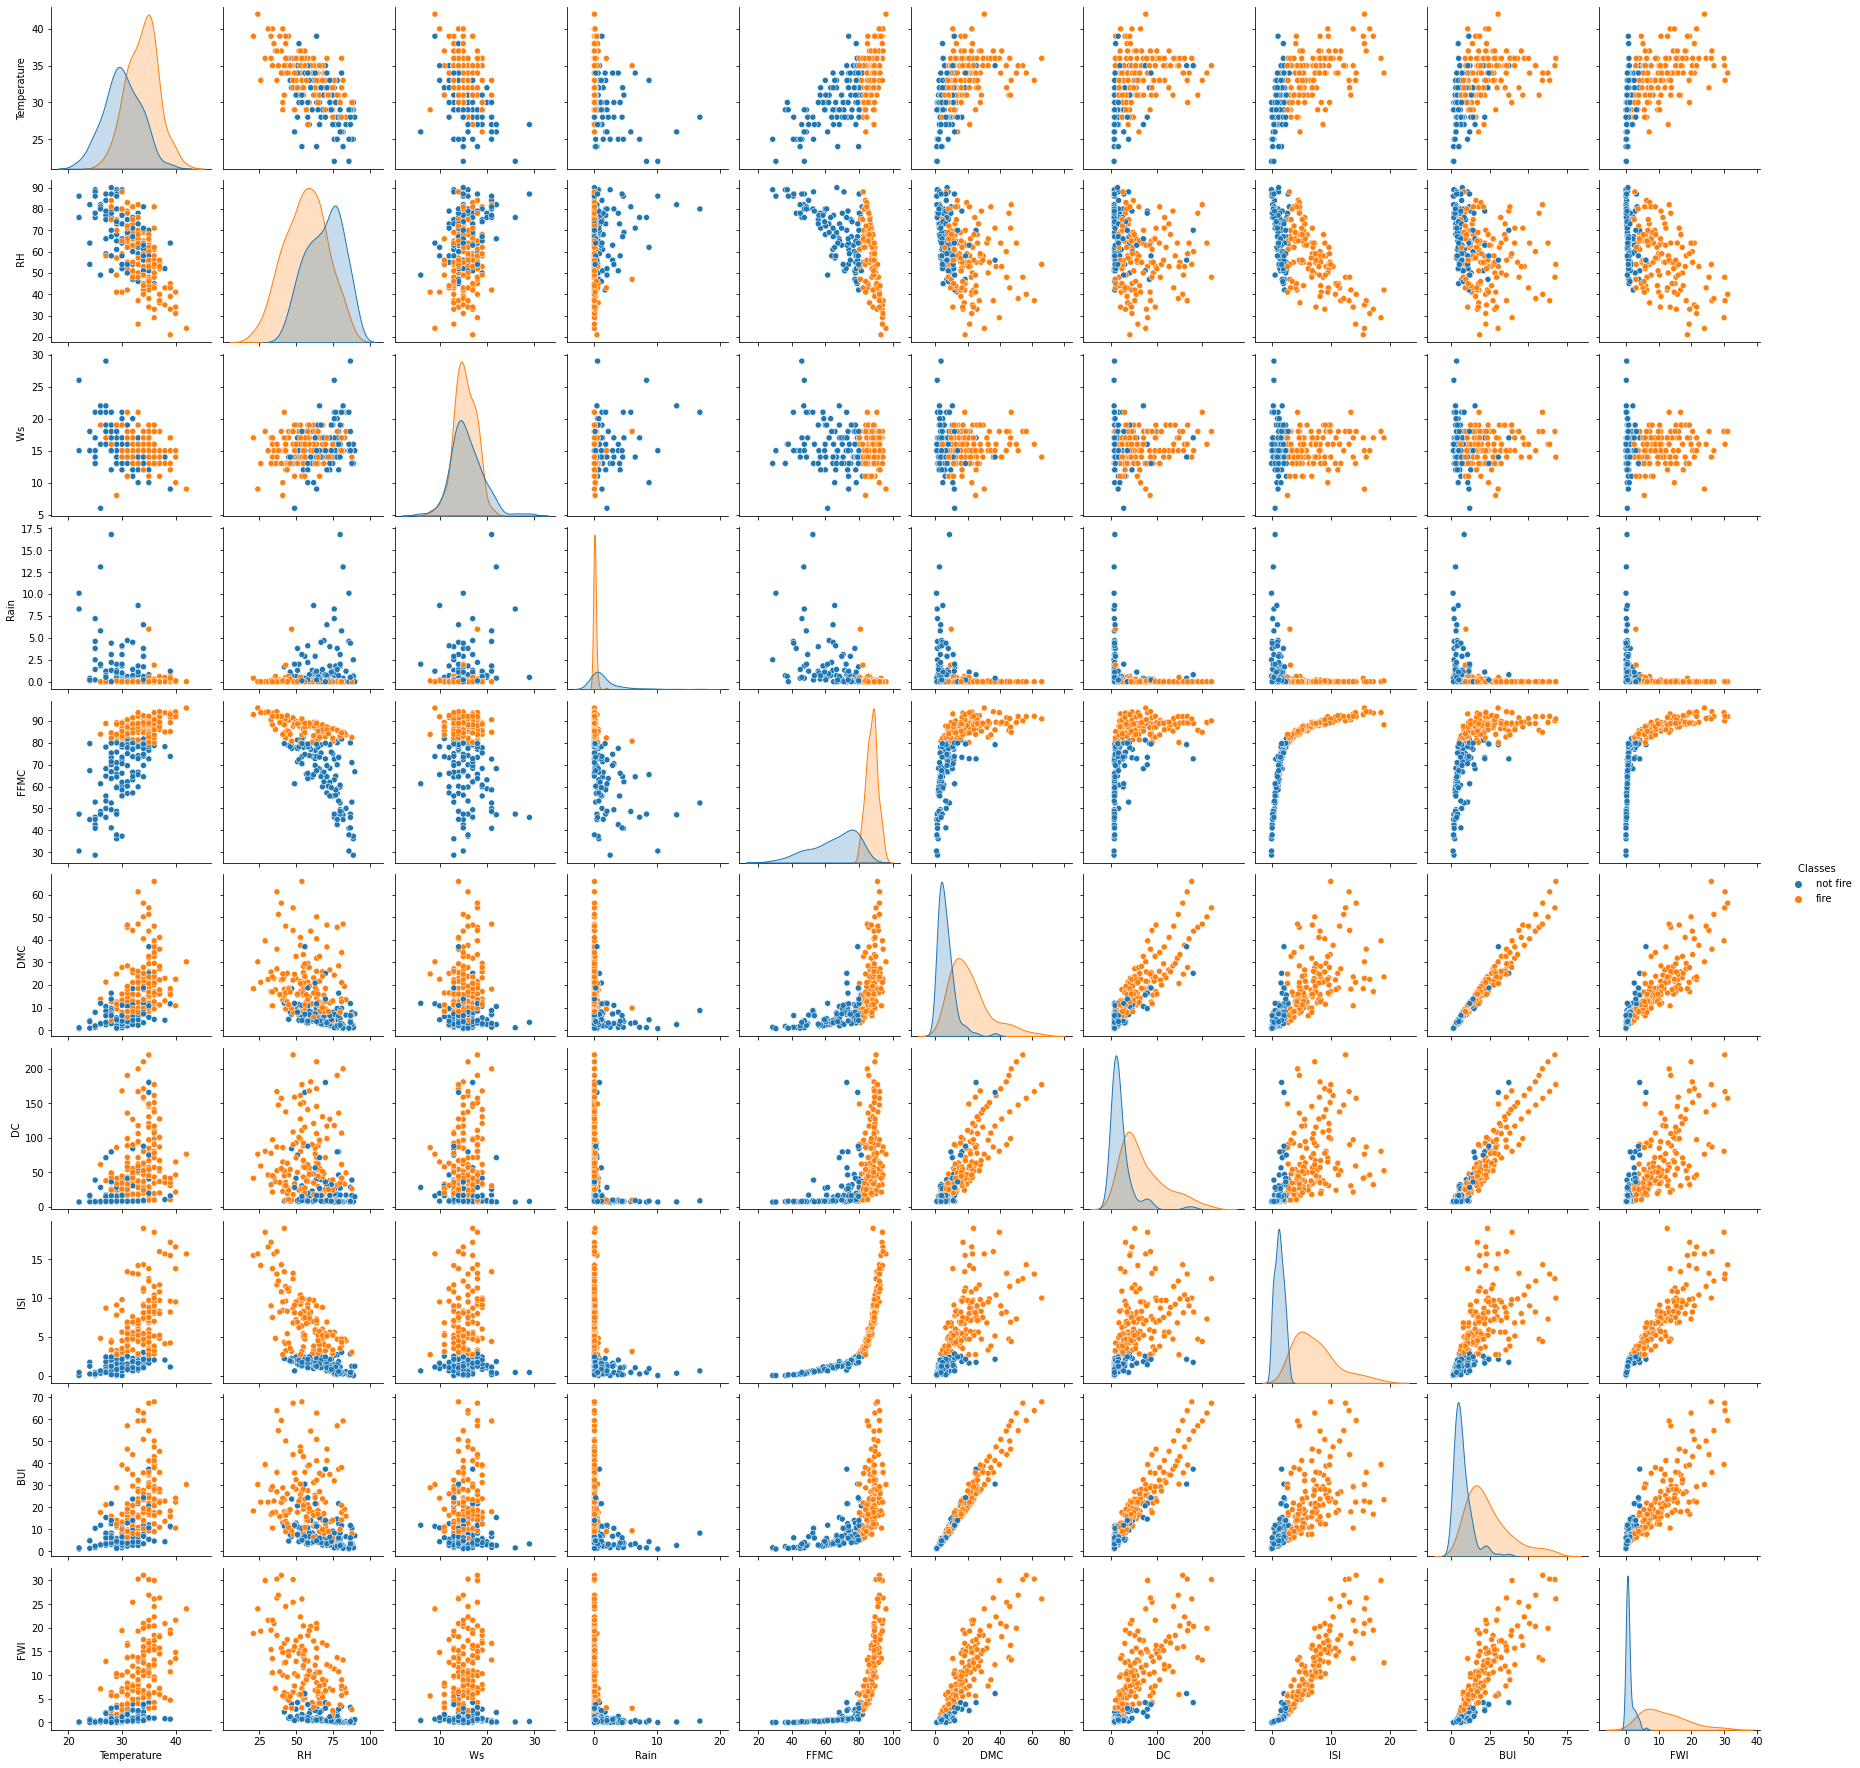

In [27]:
sns.pairplot(df,hue='Classes  ')

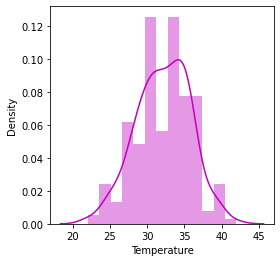

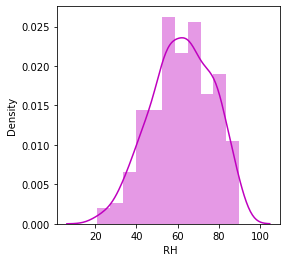

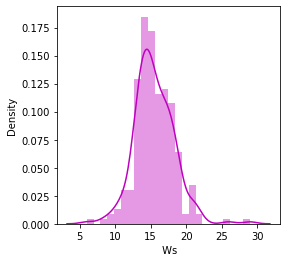

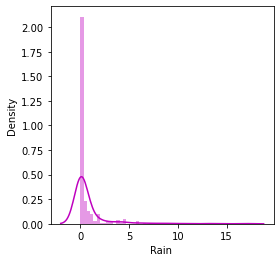

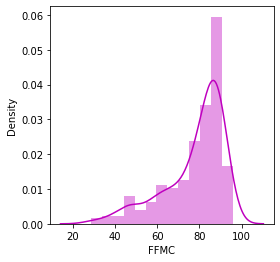

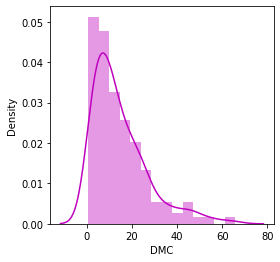

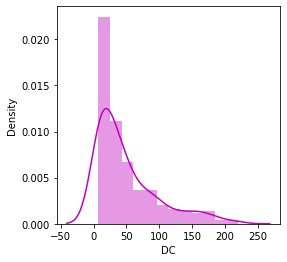

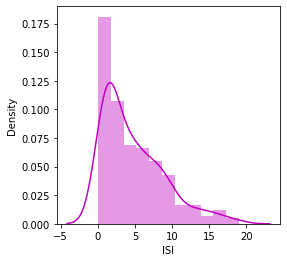

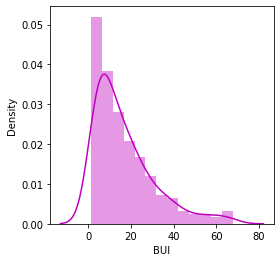

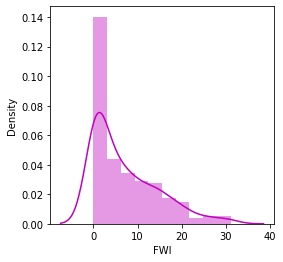

In [22]:
#identifying numerical columns
nums= df.select_dtypes(exclude='object')

#Analyzing the distribution of numerical columns
for c in nums.columns:
    plt.figure(figsize=(4,4))
    sns.distplot(nums[c],color='m')
    plt.show()

#### Rain , DC, ISI,DMC,BUI,FWI are right skewed while FFMC is left skewed .Temperature,RH,Ws is close to normal distribution

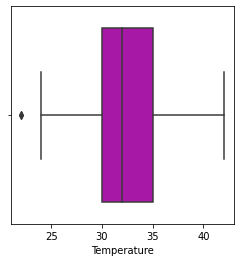

count    243.000000
mean      32.152263
std        3.628039
min       22.000000
25%       30.000000
50%       32.000000
75%       35.000000
max       42.000000
Name: Temperature, dtype: float64


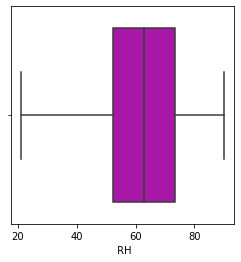

count    243.000000
mean      62.041152
std       14.828160
min       21.000000
25%       52.500000
50%       63.000000
75%       73.500000
max       90.000000
Name:  RH, dtype: float64


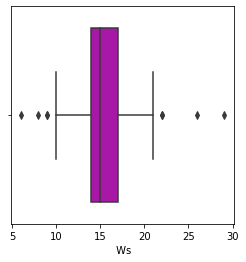

count    243.000000
mean      15.493827
std        2.811385
min        6.000000
25%       14.000000
50%       15.000000
75%       17.000000
max       29.000000
Name:  Ws, dtype: float64


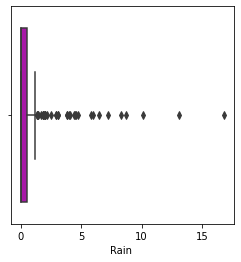

count    243.000000
mean       0.762963
std        2.003207
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max       16.800000
Name: Rain , dtype: float64


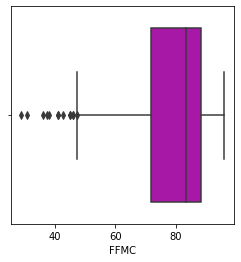

count    243.000000
mean      77.842387
std       14.349641
min       28.600000
25%       71.850000
50%       83.300000
75%       88.300000
max       96.000000
Name: FFMC, dtype: float64


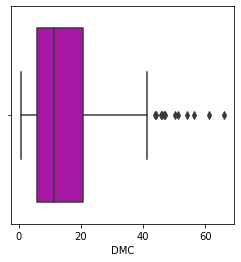

count    243.000000
mean      14.680658
std       12.393040
min        0.700000
25%        5.800000
50%       11.300000
75%       20.800000
max       65.900000
Name: DMC, dtype: float64


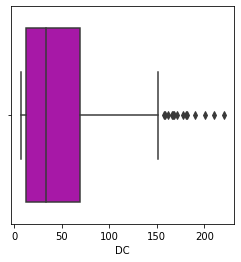

count    243.000000
mean      49.430864
std       47.665606
min        6.900000
25%       12.350000
50%       33.100000
75%       69.100000
max      220.400000
Name: DC, dtype: float64


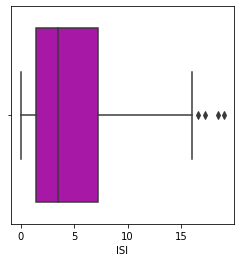

count    243.000000
mean       4.742387
std        4.154234
min        0.000000
25%        1.400000
50%        3.500000
75%        7.250000
max       19.000000
Name: ISI, dtype: float64


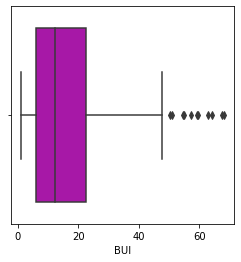

count    243.000000
mean      16.690535
std       14.228421
min        1.100000
25%        6.000000
50%       12.400000
75%       22.650000
max       68.000000
Name: BUI, dtype: float64


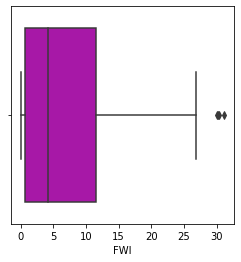

count    243.000000
mean       7.035391
std        7.440568
min        0.000000
25%        0.700000
50%        4.200000
75%       11.450000
max       31.100000
Name: FWI, dtype: float64


In [26]:
#Analyzing the outliers of numerical columns
for c in nums.columns:
    plt.figure(figsize=(4,4))
    sns.boxplot(nums[c],color='m')
    plt.show()
    print(nums[c].describe())

In [38]:
#checking multicollinearity 
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000


### BUI and DMC are highly correlated. hence dropping one column i.e drop BUI

In [40]:
df= df.drop(columns='BUI')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    int32  
 4    RH          243 non-null    float64
 5    Ws          243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  FWI          243 non-null    float64
 12  Classes      243 non-null    object 
dtypes: float64(8), int32(1), object(4)
memory usage: 33.7+ KB


In [43]:
from  sklearn.model_selection import train_test_split

In [48]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [49]:
X.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI
0,01,06,2012,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,0.5
1,02,06,2012,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,0.4
2,03,06,2012,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,0.1
3,04,06,2012,25,89.0,13.0,2.5,28.6,1.3,6.9,0.0,0.0
4,05,06,2012,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,0.5


In [50]:
y.head()

0    not fire
1    not fire
2    not fire
3    not fire
4    not fire
Name: Classes  , dtype: object

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

## Creating classification model

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Instantiate log_reg
log_reg = LogisticRegression()

#Instantiate knn
knn = KNeighborsClassifier()

#Instantiate dt
dt = DecisionTreeClassifier()

#Intantiate svm_class
svm_class = SVC()

#Instatiate Random Forest
RF = RandomForestClassifier()


In [69]:
#define list of classifiers
classifiers=[('Logistic Regression',log_reg),('K Nearest Neighbors',knn),
             ('Decision Tree Classifier',dt),('Support vector machine classifier',svm_class),
             ('Random Forest classifier',RF)]

In [54]:
from sklearn.metrics import accuracy_score

In [76]:
print("Accuracy scores of the classifiers \n")
# Iterate over the pre-defined list of classifiers
for clf_name,clf in classifiers:
    
    # fit clf to the training set
    clf.fit(X_train,y_train)
    
    #predict y_pred
    y_pred = clf.predict(X_test)
    
    #Calculate Accuracy
    accuracy = accuracy_score(y_test,y_pred)
    
    #Compare accuracy of the classifiers
    
    print('{} : {:.3f}'.format(clf_name,accuracy))
    

Accuracy scores of the classifiers 

Logistic Regression : 0.959
K Nearest Neighbors : 0.898
Decision Tree Classifier : 1.000
Support vector machine classifier : 0.551
Random Forest classifier : 0.980


In [79]:
#Feature importances in decision tree
importances= pd.Series(data=dt.feature_importances_,index = X_train.columns)
importances.sort_values(ascending=False)

FFMC           0.952682
ISI            0.026513
FWI            0.020805
day            0.000000
month          0.000000
year           0.000000
Temperature    0.000000
 RH            0.000000
 Ws            0.000000
Rain           0.000000
DMC            0.000000
DC             0.000000
dtype: float64

## Hyper parameter tuning

## Building model  

In [80]:
import pickle
pickle.dump(RF,open('model_RF.pkl','wb'))# creating model using Random Forest algorithm

In [ ]:
pickled_model = pickle.load(open('model_RF.pkl','rb'))